# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Felix Baringin Jeconiah William Samosir
- **Email:** felixbaringin@student.ub.ac.id
- **ID Dicoding:** M006D4KY2445

## Menentukan Pertanyaan Bisnis

 - Penyewaan sepeda terbanyak terjadi pada jam ?
 - Berikan perbandingan dari casual user dan registered user?

## Import Semua Packages/Library yang Digunakan

In [17]:
#Memasukkan semua library yang diperlukan untuk proses analisis data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [18]:
#Menginisiasi data dari github
day_df = pd.read_csv("https://raw.githubusercontent.com/felixb177/analisisdata/main/Bike-sharing-dataset/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/felixb177/analisisdata/main/Bike-sharing-dataset/hour.csv")
#Melihat data day.csv
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [111]:
#Melihat data hour.csv
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

In [64]:
#Melakukan proses pertama pada data wrangling, yaitu pengecekan pada data
day_df.info()
#Dapat dilihat pada data 'dteday' memiliki tipe object. Harusnya data tanggal haruslah datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [65]:
#Melihat .describe(), pada data csv
day_df.describe()
#Hal ini untuk memastikan tidak ada data yang dinilai anomali

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [66]:
#Melihat apakah ada data yang dinilai "missing value"
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [67]:
#Melihat dan memastikan tidak ada data yang merupakan duplikasi
print("Jumlah duplikasi: ",day_df.duplicated().sum())
#Proses Assessing Data pada data day.csv selesai!!! :D

Jumlah duplikasi:  0


In [68]:
#Melakukan pengecekan pada data hour.csv
hour_df.info()
#Dapat dilihat pada row dteday, memiliki datatype yang tidak pas dengan date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [69]:
#Melihat dan memastikan tidak ada data yang merupakan duplikasi
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [70]:
#Melihat .describe(), pada data csv
#Hal ini untuk memastikan tidak ada data yang dinilai anomali
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [71]:
#Melihat apakah ada data yang dinilai "missing value"
hour_df.isna().sum()
#Proses Assessing pada kedua data selesai !!!

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

In [31]:
#Cleaning Data, kita sampai pada tahap terakhir dari Data Wrangling.
#Mengganti type pada dteday menjadi datetime pada data day.csv
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [32]:
#Memastikan perubahan terlaksana
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [33]:
#Mengganti type pada dteday menjadi datetime pada data hour.csv
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [34]:
#Memastikan perubahan terlaksana
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Parameter dari pertanyaan


In [122]:
last_two_day = hour_df.tail(72)
last_two_day.groupby(by='hr').agg({'cnt':['mean','max', 'min']})

cnt          
          mean  max  min
hr                      
0    33.666667   41   26
1    28.000000   37   19
2    16.333333   19   11
3     7.333333   15    1
4     4.333333    7    3
5     4.666667    9    2
6    18.333333   40    7
7    38.666667   85   13
8    91.000000  196   33
9    93.333333  157   49
10   94.333333  122   41
11  112.666667  157   45
12  138.666667  224   48
13  152.000000  203   84
14  168.333333  247   98
15  194.000000  315  129
16  164.666667  214  133
17  135.000000  164  118
18  119.000000  125  110
19  106.000000  119   97
20   75.666667   89   66
21   65.666667   90   47
22   50.333333   61   36
23   43.333333   49   32

In [112]:
day_df.groupby(by='dteday').agg({
    'casual': 'mean',
    'registered': 'mean',
})

,casual,registered
dteday,,
2011-01-01,331.0,654.0
2011-01-02,131.0,670.0
2011-01-03,120.0,1229.0
2011-01-04,108.0,1454.0
2011-01-05,82.0,1518.0
...,...,...
2012-12-27,247.0,1867.0
2012-12-28,644.0,2451.0
2012-12-29,159.0,1182.0


## Visualization & Explanatory Analysis

### Pertanyaan 1:

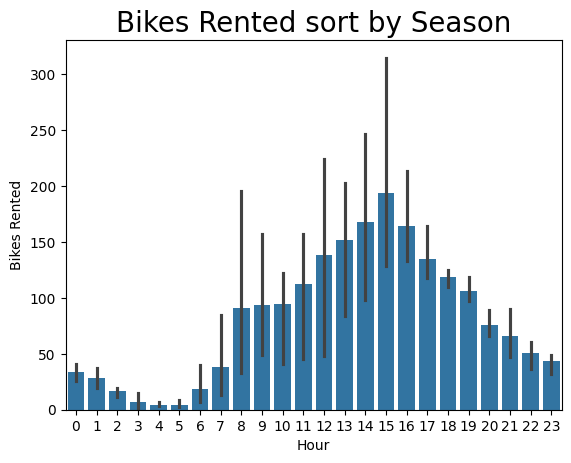

In [124]:
last_two_day = hour_df.tail(72)
last_two_day.groupby(by='hr').agg({'cnt':'mean'})
sns.barplot(data=last_two_day, x="hr", y="cnt")
plt.xlabel('Hour')
plt.ylabel('Bikes Rented')
plt.title('Bikes Rented sort by Season', size=20)
plt.show()

### Pertanyaan 2:

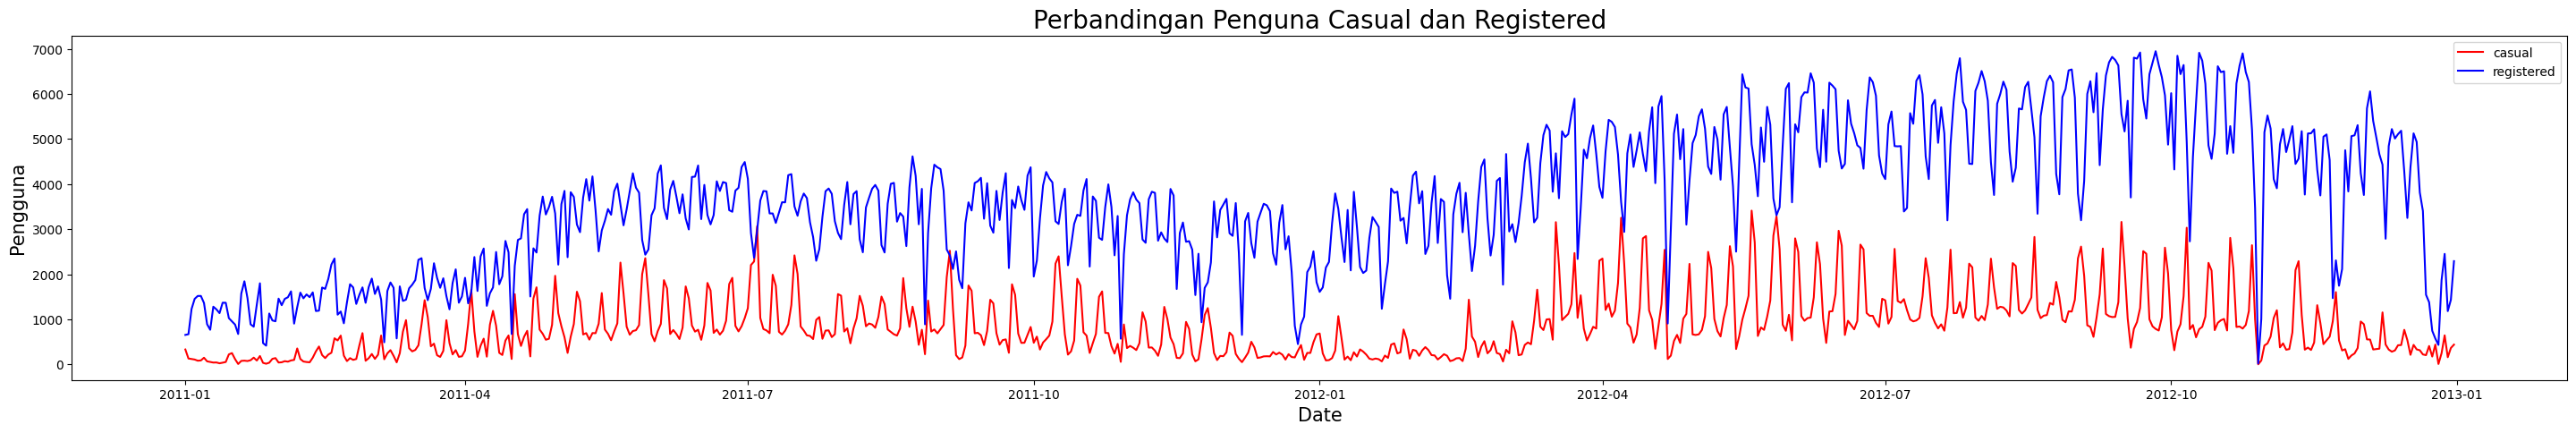

In [109]:
last_ten = day_df.tail(900)

last_ten['dteday'] = pd.to_datetime(day_df['dteday'])

plt.figure(figsize=(36, 5))
plt.plot(last_ten['dteday'], last_ten['casual'], label='casual', color='red')
plt.plot(last_ten['dteday'], last_ten['registered'], label='registered', color='blue')
plt.title('Perbandingan Penguna Casual dan Registered', size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Pengguna',size=15)
plt.legend()
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
Menggunakan Data hour.csv dan menurut data 3 hari sebelumnya. Penggunaan Sepeda terbanyak paling sering digunakan pada pukul 15:00.
- Conclution pertanyaan 2 :    
Menggunakan Data day.csv, kita dapat melihat serta membandingkan penyewa sepeda casual dan registered dengan jelas selama 2 Tahun terakhir.